<a href="https://colab.research.google.com/github/Shyamkumarnagilla/Cat-and-Dog-Image-Classifier/blob/main/Cat_and_Dog_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#kaggle installation
!pip install kaggle

In [ ]:
#configuring path of dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#importing dataset
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sampleSubmission.csv  train
image_resized	  sample_data  test1.zip	     train.zip


In [ ]:
#Extracting the ompressed dataset
from zipfile import ZipFile

In [ ]:
dataset = '/content/dogs-vs-cats.zip'

In [ ]:
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Data extraction complete')

Data extraction complete


In [ ]:
#Extracting the compressed dataset
dataset = '/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Data extraction complete')

Data extraction complete


In [ ]:
#importing required packages

import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
#Displaying Dog and Cat Images
def display_image(image_path):
  img = mpimg.imread(image_path)
  imgplt = plt.imshow(img)
  plt.show()

In [ ]:
# Resizing all images
def resize_images(original_folder, resized_folder):
  os.makedirs(resized_folder, exist_ok=True)
  for filename in os.listdir(original_folder)[:2000]:
    img_path = os.path.join(original_folder, filename)
    img = Image.open(img_path).resize((224, 224)).convert('RGB')
    newImgPath = os.path.join(resized_folder, filename)
    img.save(newImgPath)

In [ ]:
#Creating lables for resized images
def create_labels(image_folder):
  labels = []
  for filename in os.listdir(image_folder)[:2000]:
   lable = 1 if filename.startswith('dog') else 0
   labels.append(lable)
  return labels

In [ ]:
#Converting all the resized images to numpy arrays
def images_to_array(image_directory):
  files = glob.glob(os.path.join(image_directory, '*.*'))
  images = np.asarray([cv2.imread(file) for file in files])
  return images

In [ ]:
#Train test split
def split_data(X,Y):
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
  return X_train,X_test,np.array(Y_train),np.array(Y_test)

In [ ]:
#Scaling the data
def scale_data(X_train,X_test):
  X_train_scaled = X_train/255.0
  X_test_scaled = X_test/255.0
  return X_train_scaled,X_test_scaled

In [ ]:
# Building the neural network
def build_model():
    mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
    pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)
    num_of_classes = 2
    model = tf.keras.Sequential([
        pretrained_model,
        tf.keras.layers.Dense(num_of_classes)
    ])
    model.compile(
        optimizer = 'adam',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics = ['acc']
    )
    return model

In [172]:
#Predictive system
def predict_image(model,image_path):
  input_image = cv2.imread(image_path)
  cv2_imshow(input_image)
  input_image_resize= cv2.resize(input_image,(224,224))
  input_image_scaled = input_image_resize/255.0
  image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])
  input_prediction = model.predict(image_reshaped)
  input_pred_label = np.argmax(input_prediction)
  if input_pred_label == 0:
    print('The image is of a Cat')
  else:
    print('The image is of a Dog')


In [ ]:
#Resizing images
resize_images('/content/train/','/content/image_resized')

In [ ]:
#Creating labels
labels = create_labels('/content/image_resized')

In [ ]:
#Converting images to arrays
import glob

images = images_to_array('/content/image_resized')

In [ ]:
#Train Test Split
X_train,X_test,Y_train,Y_test = split_data(images,labels)

In [ ]:
#Scaling data
X_train_scaled,X_test_scaled = scale_data(X_train,X_test)

In [ ]:
#Building model
model = build_model()

In [ ]:
#Training the model
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 77s 1s/step - loss: 0.1999 - acc: 0.9206
Epoch 2/5
50/50 [==============================] - 65s 1s/step - loss: 0.0596 - acc: 0.9819
Epoch 3/5
50/50 [==============================] - 69s 1s/step - loss: 0.0421 - acc: 0.9906
Epoch 4/5
50/50 [==============================] - 68s 1s/step - loss: 0.0351 - acc: 0.9912
Epoch 5/5
50/50 [==============================] - 65s 1s/step - loss: 0.0285 - acc: 0.9931


In [ ]:
#Model Evaluation
score,acc = model.evaluate(X_test_scaled,Y_test)
print('Test Loss:',score)
print('Test Accuracy:',acc)

13/13 [==============================] - 19s 1s/step - loss: 0.1037 - acc: 0.9675
Test Loss: 0.10371177643537521
Test Accuracy: 0.9674999713897705


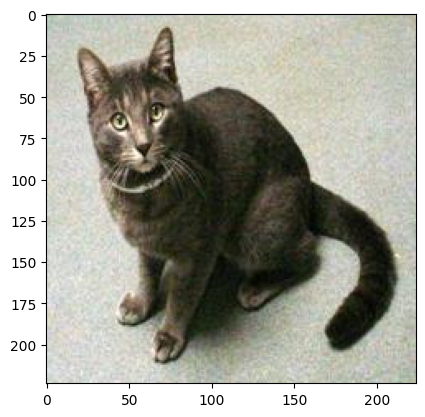

In [ ]:
#Displaying cat Image
import matplotlib.image as mpimg
display_image('/content/image_resized/cat.10234.jpg')

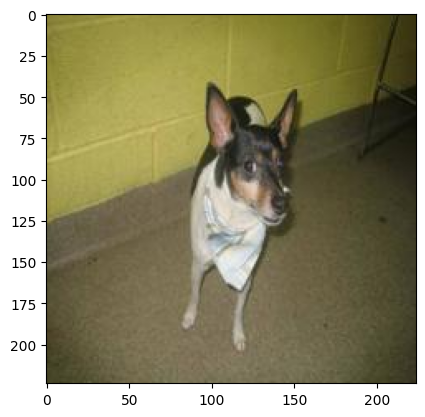

In [165]:
#Displaying dog Image
import matplotlib.image as mpimg
display_image('/content/image_resized/dog.10002.jpg')

In [166]:
#Extrating test zip file

dataset = '/content/test1.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Data extraction complete')

Data extraction complete


Enter the path of the image:/content/test1/10035.jpg


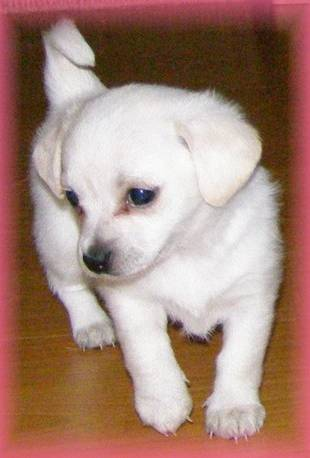

1/1 [==============================] - 0s 51ms/step
The image is of a Dog


In [174]:
#Predicitng Images
input_image_path = input('Enter the path of the image:')
predict_image(model,input_image_path)